TASK 3


In [1]:
# DATA CLEANING PROJECT
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOAD DATASET
df = pd.read_csv("C:/Users/hp/Downloads/archive (1)/AB_NYC_2019.csv") 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#DATA INTEGRITY
print(df.dtypes)

print("--Missing Values--")
print(df.isnull().sum())

print("Duplicate Rows:", df.duplicated().sum())

print("\n--BASIC STATISTICS-- ")
print(df.describe())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
--Missing Values--
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude      

In [ ]:
# MISSING DATA HANDLING
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric nulls with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical nulls with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
# REMOVE DUPLICATES
df.drop_duplicates(inplace=True)
print("Remaining rows:", len(df))

Remaining rows: 48895


In [9]:
#STANDARDIZATION (SCALING)
scaler = StandardScaler()
df_scal = df.copy()

# Scale only numeric columns
df_scal[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
#OUTLIER DETECTION USING IQR


def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return (column < lower) | (column > upper)

outlier_summary = pd.DataFrame({
    col: detect_outliers(df[col]).sum()
    for col in num_cols
}, index=["Outlier Count"]).T

print(outlier_summary)

                                Outlier Count
id                                          0
host_id                                  1526
latitude                                  425
longitude                                2833
price                                    2972
minimum_nights                           6607
number_of_reviews                        6021
reviews_per_month                        4103
calculated_host_listings_count           7081
availability_365                            0


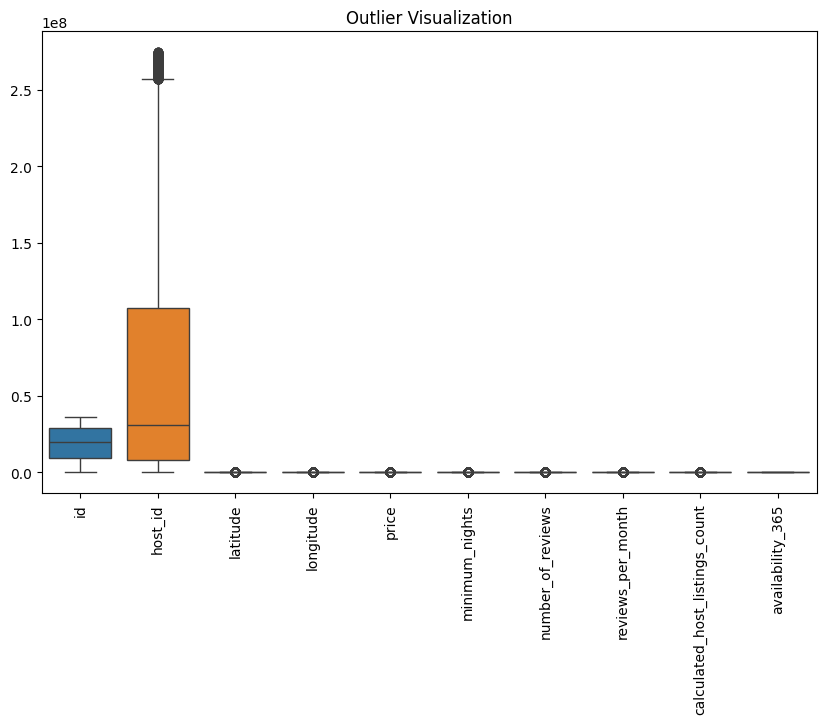

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Visualization")
plt.show()